In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams

rcParams['font.family'] = ['Trebuchet MS']


In [8]:
df = pd.read_excel("data_abgrid_per_analisi.xlsx")
df.head(1)

,corso,soggetto,anno,id,contesto,lns_a,ic_a,pr_a,bt_a,cl_a,...,mutual_preferences,mutual_rejections,balance,orientation,impact,affiliation_coeff_raw,influence_coeff_raw,affiliation_coeff,influence_coeff,status
0,vega,ABBAMONDI MARIO,i,A,stu,"N, S, W",0.0,0.004934,0.0,0.0,...,0,0,-2,0,2,-2,0,92.25023,92.453141,underrated


Text(0, 0.5, 'affiliation')

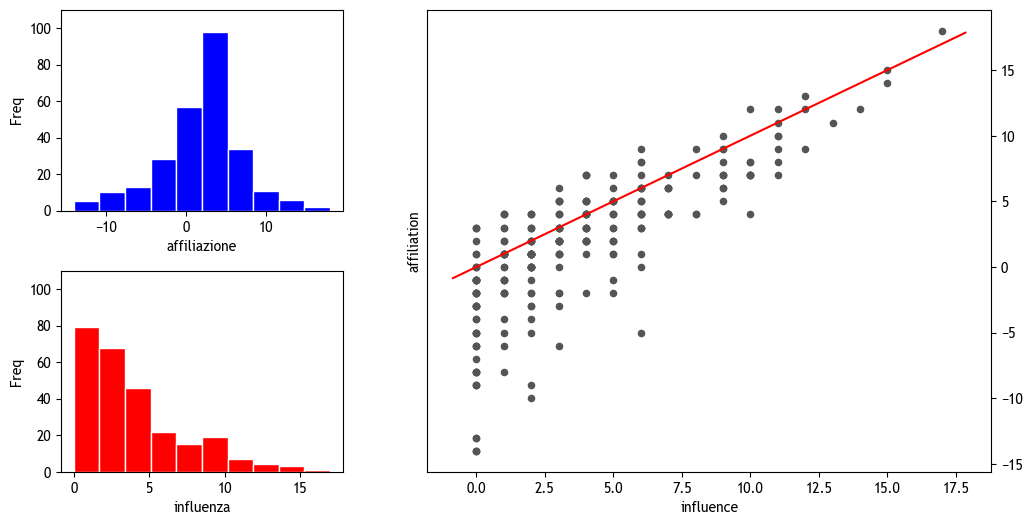

In [76]:
fig = plt.figure(figsize=(12,6))

gs = GridSpec(nrows=2, ncols=2, width_ratios=[1,2], hspace=.3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

df["affiliation_coeff_raw"].plot.hist(ax=ax1, color="#00F", ec='#FFF')
ax1.set_xlabel("affiliazione")
df["influence_coeff_raw"].plot.hist(ax=ax2, color="#F00", ec='#FFF')
ax2.set_xlabel("influenza")

for ax in (ax1, ax2):
    ax.set_ylabel("Freq")
    ax.set_ylim(0,110)


df.plot.scatter(x="influence_coeff_raw", y="affiliation_coeff_raw", color="#555555",  ax=ax3)
coefficients = np.polyfit(df["influence_coeff_raw"], df["influence_coeff_raw"], 1)
polynomial = np.poly1d(coefficients)
x_line = np.linspace(ax3.get_xlim()[0], ax3.get_xlim()[1], 100)
y_line = polynomial(x_line)
ax3.plot(x_line, y_line, color='red', label=f'Polynomial degree 1')
ax3.yaxis.tick_right()
ax3.set_xlabel("influence")
ax3.set_ylabel("affiliation")